## Regresión Lineal Múltiple

La regresión lineal múltiple es una extensión del concepto de regresión lineal simple que permite modelar la relación entre una variable de respuesta (también conocida como variable dependiente u objetivo) y múltiples variables predictoras (también conocidas como variables independientes o características). 

**La diferencia con la regresión lineal anterior es que ahora existen más de una variable predictiva, las cuales buscan estimar el valor de $y$.**

$$ \widehat{y} = w_0 + w_1 x_1 +  w_2 x_2 + ... + w_n x_n + ε$$

$$ \widehat{y} = W^T X $$


Donde: 

$ W^T = \begin{bmatrix}
w_0 &w_1 &w_2 &... &w_n 
\end{bmatrix} $ es la matriz de coeficientes o pesos.

$X = \begin{bmatrix}
1\\ 
x_1\\ 
x_2\\
...\\
x_n\\
\end{bmatrix}$ es la matriz de variables.

$ε$ es el término de error, que representa el "ruido" o variabilidad no explicada por el modelo.

En algunos modelos el término $ε$ es "ignorado" o se suma al valor de $w_0$ debido a que ambos son escalares o términos sin variables.


El objetivo de la regresión lineal múltiple es estimar los valores de los coeficientes de la matriz $W$ que minimizan la diferencia entre las predicciones del modelo y los valores reales. Esta regresión también usa el método de **Mínimos Cuadrados**, al igual que la regresión lineal simple.

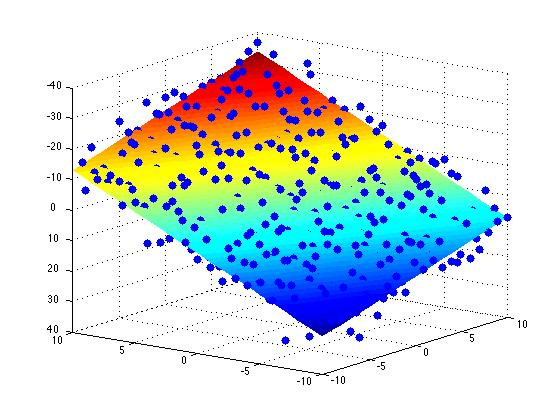

Para calcular esta recta aplicamos el algoritmo de **Mínimos Cuadrados** generalizado para $n$ dimensiones:

1. Construimos una matriz $X$ de tamaño $m$ (número de filas) y $n + 1$ (número de columnas, características y término independiente).


2. Contruimos la matriz de salida $y$, que será una matriz con los valores reales de cada fila.


3. Calculamos la matriz $W$ usando el algoritmo de **Mínimos Cuadrados** para $n$ dimensiones:

$$W = (X^TX)^{-1}X^Ty$$

Como resultado quería un vector con $n + 1$ dimensiones.

4. Definimos la recta de predicción de $n$ dimensiones:

$$\widehat{y} = W^TX$$

$$\widehat{y} = w_0 + w_1 x_1 +  w_2 x_2 + ... + w_n x_n$$

**La regresión lineal simple y la regresión multilineal se basan en los mismos conceptos y las mismas técnicas de evaluación.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../Data/FuelConsumptionCo2.csv")

df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


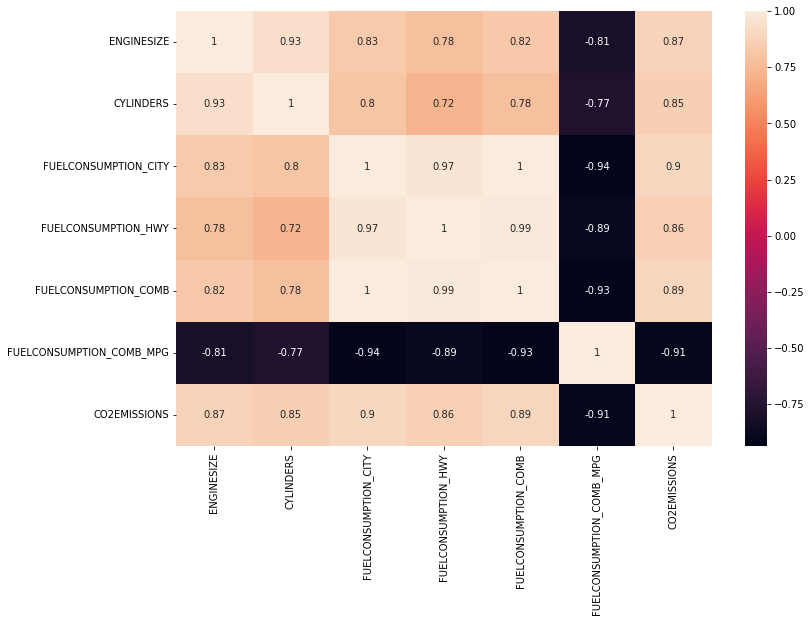

In [23]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df._get_numeric_data().iloc[:, 1:].corr(), annot = True)
plt.show()

In [5]:
# Esta vez vamos a utilizar 3 columnas para predecir "CO2EMISSIONS"

df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]].head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
0,2.0,4,9.9
1,2.4,4,11.2
2,1.5,4,6.0
3,3.5,6,12.7
4,3.5,6,12.1


In [6]:
X = np.array(df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])

y = np.array(df["CO2EMISSIONS"])

In [17]:
X

array([[ 2. ,  4. ,  9.9],
       [ 2.4,  4. , 11.2],
       [ 1.5,  4. ,  6. ],
       ...,
       [ 3. ,  6. , 13.4],
       [ 3.2,  6. , 12.9],
       [ 3.2,  6. , 14.9]])

In [7]:
X.shape, y.shape

((1067, 3), (1067,))

### Train, Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((746, 3), (746,))
Conjunto de Test: ((321, 3), (321,))


In [9]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [11.31644307  5.92086631  8.51296695]
w_0: 71.15322931289452


### Predicciones

In [10]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:302.80713328088746 	Valor real:304
Predicción:242.48250447395043 	Valor real:221
Predicción:275.9634232017113 	Valor real:294
Predicción:237.67557963475696 	Valor real:221
Predicción:206.85573369076118 	Valor real:207


### Metricas

In [11]:
# Sklearn tiene las formulas de algunas métricas en funciones.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [25]:
y.mean() 

256.2286785379569

In [16]:
print(f"MAE:\t {mean_absolute_error(y_test, yhat)}")
print(f"RMSE:\t {mean_squared_error(y_test, yhat, squared=False)}")
print(f"R**2:\t {r2_score(y_test, yhat)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 16.604448793489887
RMSE:	 22.44351249642267
R**2:	 0.8751179804497035
RAE:	 0.31878764113144237
RSE:	 0.12488201955029653
Adjusted R**2:	 0.8739361316842432


In [26]:
(mean_absolute_error(y_test, yhat)*100)/y.mean() 

6.480324094958854

### y_test vs yhat

In [18]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
279,224,224.054833,0.0245
25,196,196.079478,0.0406
4,207,206.855734,0.0697
304,380,380.361622,0.0952
268,212,212.233608,0.1102
302,207,207.406175,0.1962
46,244,244.485953,0.1992
167,331,330.298214,0.2120
15,255,254.400658,0.2350
145,255,254.400658,0.2350


In [27]:
df_pred.diferencia.mean()

6.715013395638632

In [19]:
df_pred.tail(20)

,y_test,yhat,diferencia
9,264,310.866588,17.7525
239,259,307.461401,18.7110
6,259,308.312698,19.0397
181,138,165.142196,19.6683
189,136,162.889161,19.7714
251,175,211.835823,21.0490
162,195,238.353711,22.2327
92,175,214.389714,22.5084
75,237,294.691950,24.3426
70,280,350.469494,25.1677


In [20]:
df.loc[147,]

MODELYEAR                           2014
MAKE                               BUICK
MODEL                       LACROSSE AWD
VEHICLECLASS                    MID-SIZE
ENGINESIZE                           3.6
CYLINDERS                              6
TRANSMISSION                         AS6
FUELTYPE                               E
FUELCONSUMPTION_CITY                19.4
FUELCONSUMPTION_HWY                 13.0
FUELCONSUMPTION_COMB                16.5
FUELCONSUMPTION_COMB_MPG              17
CO2EMISSIONS                         264
Name: 147, dtype: object

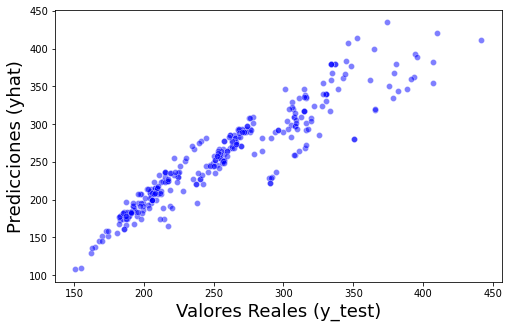

In [21]:
# Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (yhat)

plt.figure(figsize = (8, 5))

sns.scatterplot(x = yhat.flatten(), y = y_test.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_test)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

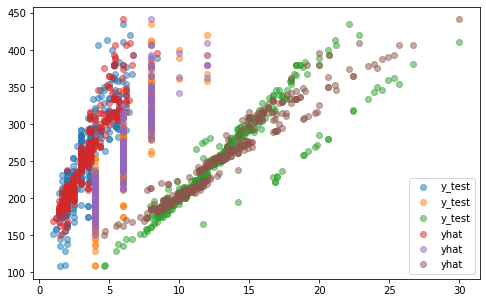

In [22]:
# Si graficamos X_test vs y_test obtenemos la nube de puntos de valores reales

# Si graficamos X_test vs yhat obtenemos la "nube" de puntos de valores predichos

plt.figure(figsize = (8, 5))

plt.plot(X_test, y_test, marker = "o", linestyle = "", label = "y_test", alpha = 0.5)

plt.plot(X_test, yhat, marker = "o", linestyle = "", label = "yhat", alpha = 0.5)

plt.legend()
plt.show()

In [ ]:
################################################################################################################################